In [1]:
import numpy as np
from scipy import constants as cons
import matplotlib.pyplot as plt
from random import randint
import random
import time
%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (15.0, 3.0)
plt.rcParams['font.size'] = 16

# Aufgabe 4.3 Ising model on  a ring


7.242973034150648e+22
0.0
7.242973034150648e+22
0.0
7.242973034150648e+22
0.0
7.242973034150648e+22
0.0
7.242973034150648e+22
0.0
7.242973034150648e+22
0.0
7.242973034150648e+22
0.0
7.242973034150648e+22
0.0
7.242973034150648e+22
0.0
7.242973034150648e+22
0.0
500.0
7.242973034150648e+21
0.0
7.242973034150648e+21
0.0
7.242973034150648e+21
0.0
7.242973034150648e+21
0.0
7.242973034150648e+21
0.0
7.242973034150648e+21
0.0
7.242973034150648e+21
0.0
7.242973034150648e+21
0.0
7.242973034150648e+21
0.0
7.242973034150648e+21
0.0
500.0
7.242973034150648e+20
0.0
7.242973034150648e+20
0.0
7.242973034150648e+20
0.0
7.242973034150648e+20
0.0
7.242973034150648e+20
0.0
7.242973034150648e+20
0.0
7.242973034150648e+20
0.0
7.242973034150648e+20
0.0
7.242973034150648e+20
0.0
7.242973034150648e+20
0.0
500.0
7.242973034150648e+19
0.0
7.242973034150648e+19
0.0
7.242973034150648e+19
0.0
7.242973034150648e+19
0.0
7.242973034150648e+19
0.0
7.242973034150648e+19
0.0
7.242973034150648e+19
0.0
7.242973034150648e+1

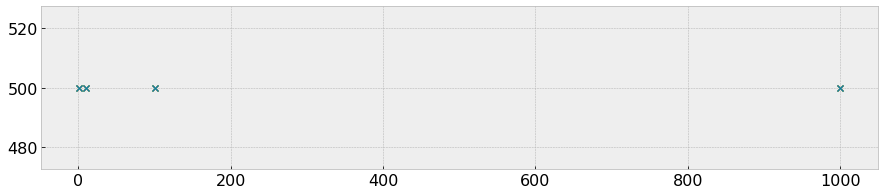

In [64]:
N = 1000 # spins
relaxing = 10
Temps = [1, 10, 100, 1000]
p_liste = []
H = 200
for T in Temps:
    for t in range(relaxing):
        β = 1/(cons.Boltzmann * T)
        print(β)
        p = np.exp(-β*H)
        print(p)
        p_liste.append(p)
        Spins = np.random.choice([-1,1],N, p=[p,1-p])
        J = .5
        H = J * np.sum(Spins*np.roll(Spins, 1))
        plt.plot(T,H,"x")
    print(H)

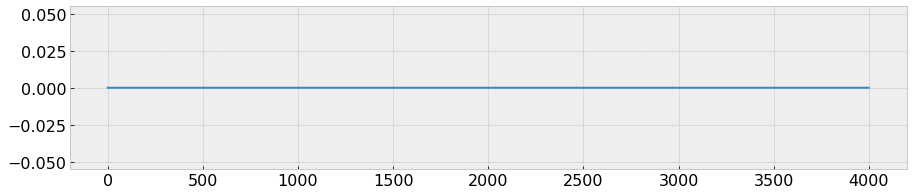

In [61]:
plt.plot(p_liste)

In [68]:
import os, sys, math, random, io, numpy, copy
from scipy.io import savemat

n=1 #Input dimensions
m=100
tmax=200 #input number of time steps
kT=4.0 #input temperature. 


#Calcualte the change in energy due to flipping one point on the grid. Flip the sign of DeltaE to get anti-ferromagnetic case. 
def delta_energy(array,i,j):
        deltaE = 2*array[i][j]*(array[i][(j+1) % (m)]+array[i][(j-1) % (m)]+array[(i+1)%n][j]+array[(i-1)%n][j])
        return deltaE

def main ():
    #Create a random grid of -1 and 1
    startingArray=numpy.random.choice([1,-1],[n,m])

    #Set that grid to be the array that will cycle through the loop
    currentArray=startingArray

    #Print that array to check it looks good. Commented out for now. 
    #print(currentArray)

    #This would be the file to export to get a movie. Deepcopy is SLOOWW, so I don't do this when I don't have to. that's why the relevant sections are commendted out. 
    #fullData=[]
    #fullData.append(copy.deepcopy(currentArray))

    #store an array that will be the magnetisms at each time.
    magnetism=[numpy.sum(currentArray)]

    #begin time loop
    for t in range(0,tmax):

        #begin row loop
        for i in range(0,n):

            #begin column loop
            for j in range(0,m):

                #calculate change in energy
                deltaE=delta_energy(currentArray,i,j)

                #calculate probability of flip
                prob=math.exp(-deltaE/kT)

                #execute test and flip. 
                if random.random() < prob:
                    currentArray[i][j]=-1*currentArray[i][j]
                    
        #print(currentArray)

        #Add current magnetism to that list. 
        currentMagnetism=numpy.sum(currentArray)
        magnetism.append(currentMagnetism)
        #fullData.append(copy.deepcopy(currentArray))
    #print(currentArray)

    #get magnetism
    print(magnetism)
    
    #savemat('temp.mat',{'fulldata':fullData})

main()


[2, 32, 14, 10, 26, 42, 34, 28, 8, 6, 14, 22, 26, 14, 2, 6, 14, 0, -4, -4, 0, -16, 4, 20, 22, 4, -4, -28, -26, -20, -4, 2, -12, -18, -32, -38, -14, -4, -16, -20, -42, -48, -26, -40, -36, -10, -26, -4, 4, -2, 10, 4, -16, -2, 14, 12, 20, 10, 6, 8, 16, 16, 6, 10, 10, 8, 2, -26, -20, 6, 6, 8, 12, 6, 22, 24, 8, -8, 0, 2, 28, 32, 36, 24, 36, 20, 14, 8, 12, 16, 18, 4, -4, -8, -14, 8, 20, -6, 12, 8, 12, 4, 32, 30, 30, 26, 32, 8, -28, -10, -20, -20, 2, 16, 0, -8, -18, -18, -18, 2, 16, 2, -10, -4, -8, -2, -4, -28, -18, 16, 4, -6, -2, -4, -10, 2, 2, 26, 18, 22, 14, 6, 2, 12, 8, 14, 18, -6, -2, 32, 4, 6, 24, 26, 2, -10, -12, -20, 12, -8, 4, -4, 0, -16, -24, -32, -20, -18, -8, -4, -24, -20, -40, -16, 12, 14, 22, 26, -4, 4, 0, 2, 18, 22, 16, 6, -10, -24, -44, -44, -26, -8, 10, 2, -8, -12, -30, -46, -22, 10, 20]


inf

# Aufgabe 4.1 monte carlo

In [117]:
Ns = [1e3,1e5,1e7,1e8]#,1e9,1e10]
bs = [1e3,1e4,1e5,1e6,1e7,1e8]
N = 1000000
a, b = 0, 1e5
I_1_a = np.zeros([len(Ns),len(bs)])
I_2_a = np.zeros([len(Ns),len(bs)])
for iN, N in enumerate(Ns):
    for ib, b in enumerate(bs):
        I_1s=0
        I_2s=0
        for r in range(10):
            x_i = np.random.uniform(a,b,int(N))
            I_1 = (b-a)/N * sum(x_i*np.exp(-x_i))
            I_1s += I_1
            I_2 = (b-a)/N * sum(np.sin(np.pi*x_i)*np.exp(-x_i))
            I_2s += I_2
        I_1_a[iN,ib] = I_1s/10
        I_2_a[iN,ib] = I_2s/10
    print(iN)

0
1
2
3


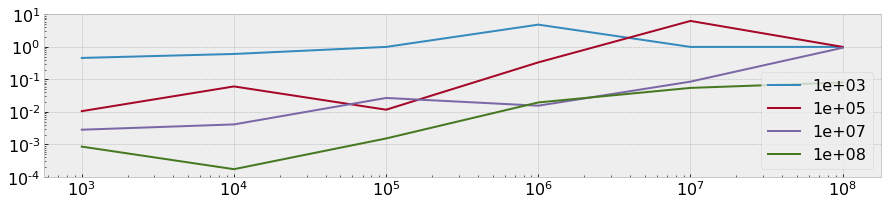

In [116]:
for i in range(I_1_a.shape[0]):
    plt.plot(bs,abs(1-I_1_a[i]), label = "%.0e"%Ns[i])
plt.semilogx()
plt.semilogy()
plt.legend()
plt.show()

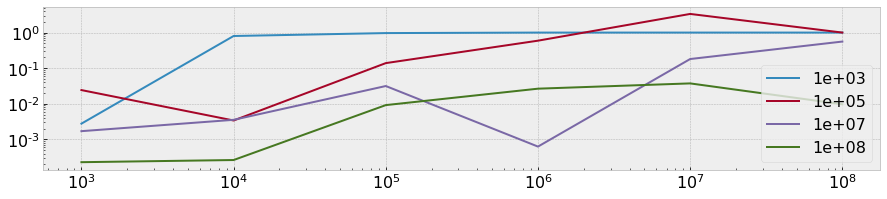

In [118]:
for i in range(I_1_a.shape[0]):
    plt.plot(bs,abs(1-I_1_a[i]), label = "%.0e"%Ns[i])
plt.semilogx()
plt.semilogy()
plt.legend()
plt.show()

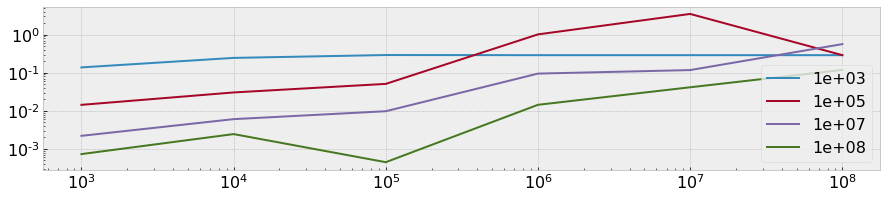

In [121]:
for i in range(I_2_a.shape[0]):
    plt.plot(bs,abs(np.pi/(1+np.pi**2)-I_2_a[i]), label = "%.0e"%Ns[i])
plt.semilogx()
plt.semilogy()
plt.legend()
plt.show()

# Aufgabe 4.2 Markow-Kette

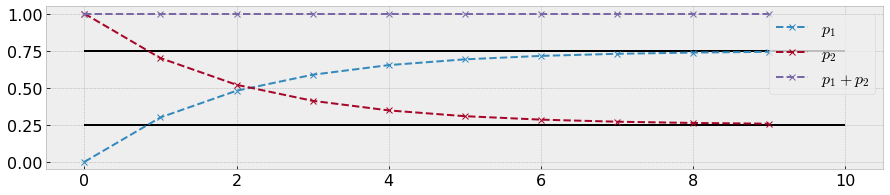

In [40]:
Schritte = 10
β, α = 0.3, 0.1
p_1, p_2 , p_3 = np.zeros(Schritte), np.zeros(Schritte), np.zeros(Schritte)
p_1[0], p_2[0], p_3[0] = 0, 1, 0#β, α
for n in range(Schritte-1):
    p_1[n + 1] = (1 - α) * p_1[n] + β * p_2[n]
    p_2[n + 1] = α * p_1[n] + (1 - β) * p_2[n]
    p_3[n + 1] = (1 - α) * p_3[n] - β * p_3[n]
plt.plot(p_1, "x--", label ="$p_1$")
plt.plot(p_2, "x--", label ="$p_2$")
#plt.plot(p_3, "x--", label ="$p_3$")
plt.plot(p_1+p_2, "x--", label ="$p_1 +p_2$")
plt.hlines(α/(α+β), 0, Schritte)
plt.hlines(β/(α+β), 0, Schritte)
plt.legend()
plt.show()

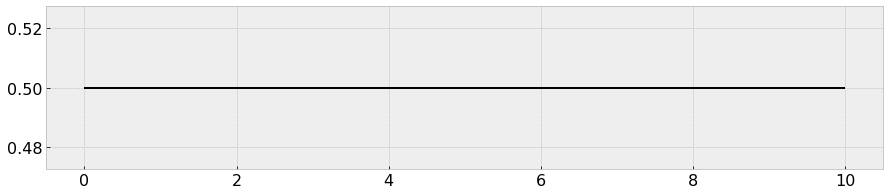

In [37]:
realisierungen = 1000
walks = np.z
for rea in realisierungen:
    for t in Schritte:
        
